# IF3070 Foundations of Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 39

Group Members:
- Abel Apriliani (18222008)
- Olivia Christy Lismanto (18222036)
- Khansa Adilla Reva (18222044)
- Nafisha Virgin (18222062)

## Import Libraries

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import zscore
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold
)
from imblearn.over_sampling import SMOTE


# Import other libraries if needed

## Import Dataset

In [211]:
from google.colab import drive
#drive.mount('/content/drive')

In [212]:
df_train = pd.read_csv('https://drive.google.com/uc?id=1izwamM6WCQq1-6QZnPkAaPH5r_3aMQjO')

In [213]:
df_train = df_train.set_index('id')
df_train.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
id,,,,,,,,,,,,,,,,,,,,,
1,NaN,https://www.northcm.ac.th,24.0,www.northcm.ac.th,17.0,0.0,NaN,0.800000,NaN,NaN,...,0.0,0.0,1.0,NaN,3.0,NaN,69.0,NaN,NaN,1
4,8135291.txt,http://uqr.to/1il1z,NaN,NaN,NaN,NaN,to,1.000000,0.000896,0.036850,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,0
5,586561.txt,https://www.woolworthsrewards.com.au,35.0,www.woolworthsrewards.com.au,28.0,0.0,au,0.857143,NaN,0.060894,...,1.0,0.0,1.0,33.0,7.0,8.0,15.0,NaN,2.0,1
6,NaN,NaN,31.0,NaN,NaN,NaN,com,0.562500,0.522907,0.055829,...,1.0,0.0,1.0,24.0,5.0,14.0,NaN,NaN,NaN,1
11,412632.txt,NaN,NaN,www.nyprowrestling.com,22.0,0.0,NaN,1.000000,NaN,NaN,...,0.0,0.0,1.0,NaN,NaN,14.0,NaN,0.0,NaN,1


# Exploratory Data Anaysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

In [214]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140404 entries, 1 to 235795
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    82872 non-null   object 
 1   URL                         96917 non-null   object 
 2   URLLength                   79765 non-null   float64
 3   Domain                      70207 non-null   object 
 4   DomainLength                94085 non-null   float64
 5   IsDomainIP                  98274 non-null   float64
 6   TLD                         95005 non-null   object 
 7   CharContinuationRate        92362 non-null   float64
 8   TLDLegitimateProb           87531 non-null   float64
 9   URLCharProb                 88333 non-null   float64
 10  TLDLength                   92673 non-null   float64
 11  NoOfSubDomain               96344 non-null   float64
 12  HasObfuscation              74684 non-null   float64
 13  NoOfObfuscatedChar 

## Data Understanding

The objective of this section is for participants to understand the quality of the provided data

### 1. Data Size

In [215]:
# Dimensions of the data
print(f"Number of rows: {df_train.shape[0]}, Number of columns: {df_train.shape[1]}")

Number of rows: 140404, Number of columns: 55


In [216]:
# Column is the number of features
# Row is the number of instances

print(f"Number of instances: {df_train.shape[0]}")
print(f"Number of features: {df_train.shape[1] - 1}") # -1 to remove target class
print(f"Number of target class: 1")


Number of instances: 140404
Number of features: 54
Number of target class: 1


### 2. Data Types

In [217]:
df_train.dtypes

,0
FILENAME,object
URL,object
URLLength,float64
Domain,object
DomainLength,float64
IsDomainIP,float64
TLD,object
CharContinuationRate,float64
TLDLegitimateProb,float64
URLCharProb,float64


### 3. Features and Target

In [218]:
features : list[str] = [col for col in df_train.columns if col not in ['id', 'label']]
df_train_features = df_train[features]

binary_cols: list[str] = [col for col in df_train_features.columns if df_train_features[col].nunique() == 2]
cat_cols: list[str] = [col for col in df_train_features.columns if df_train_features[col].dtype == 'object']
cat_cols: list[str] = list(set(cat_cols) | set(binary_cols))
df_train_cat = df_train[cat_cols]

target_col : str = 'label'
df_train_target = df_train[target_col]

non_cat_cols : list[str] = [col for col in df_train_features.columns if col not in cat_cols ]
df_train_non_cat = df_train[non_cat_cols]

print(f"Categorical Columns ({len(cat_cols)}): {cat_cols}")
print(f"Non Categorical Columns ({len(non_cat_cols)}): {non_cat_cols}")
print(f"Target Column: {target_col}")


Categorical Columns (24): ['HasCopyrightInfo', 'HasSubmitButton', 'Crypto', 'TLD', 'HasSocialNet', 'IsHTTPS', 'NoOfURLRedirect', 'Robots', 'HasDescription', 'IsResponsive', 'Domain', 'Bank', 'HasHiddenFields', 'FILENAME', 'NoOfSelfRedirect', 'HasObfuscation', 'HasTitle', 'HasExternalFormSubmit', 'Title', 'HasFavicon', 'HasPasswordField', 'URL', 'Pay', 'IsDomainIP']
Non Categorical Columns (30): ['URLLength', 'DomainLength', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'LineOfCode', 'LargestLineLength', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'NoOfPopup', 'NoOfiFrame', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']
Target Column: label


### 4. Unique Values

In [219]:
for col in cat_cols:
    print(f"{col}: {df_train[col].nunique()}")

HasCopyrightInfo: 2
HasSubmitButton: 2
Crypto: 2
TLD: 497
HasSocialNet: 2
IsHTTPS: 2
NoOfURLRedirect: 2
Robots: 2
HasDescription: 2
IsResponsive: 2
Domain: 69832
Bank: 2
HasHiddenFields: 2
FILENAME: 82872
NoOfSelfRedirect: 2
HasObfuscation: 2
HasTitle: 2
HasExternalFormSubmit: 2
Title: 79460
HasFavicon: 2
HasPasswordField: 2
URL: 96914
Pay: 2
IsDomainIP: 2


In [220]:
# column that its unique values appear more than once

result = {}
for col in cat_cols:
    value_counts = df_train[col].value_counts()
    count = (value_counts > 1).sum()
    result[col] = count

for col, count in result.items():
    print(f"Column '{col}' has {count} attributes appearing more than once")

Column 'HasCopyrightInfo' has 2 attributes appearing more than once
Column 'HasSubmitButton' has 2 attributes appearing more than once
Column 'Crypto' has 2 attributes appearing more than once
Column 'TLD' has 360 attributes appearing more than once
Column 'HasSocialNet' has 2 attributes appearing more than once
Column 'IsHTTPS' has 2 attributes appearing more than once
Column 'NoOfURLRedirect' has 2 attributes appearing more than once
Column 'Robots' has 2 attributes appearing more than once
Column 'HasDescription' has 2 attributes appearing more than once
Column 'IsResponsive' has 2 attributes appearing more than once
Column 'Domain' has 86 attributes appearing more than once
Column 'Bank' has 2 attributes appearing more than once
Column 'HasHiddenFields' has 2 attributes appearing more than once
Column 'FILENAME' has 0 attributes appearing more than once
Column 'NoOfSelfRedirect' has 2 attributes appearing more than once
Column 'HasObfuscation' has 2 attributes appearing more than o

In [221]:
for col in non_cat_cols:
    print(f"{col}: {df_train[col].nunique()}")

URLLength: 215
DomainLength: 80
CharContinuationRate: 463
TLDLegitimateProb: 410
URLCharProb: 87625
TLDLength: 11
NoOfSubDomain: 8
NoOfObfuscatedChar: 8
ObfuscationRatio: 26
NoOfLettersInURL: 193
LetterRatioInURL: 500
NoOfDegitsInURL: 82
DegitRatioInURL: 378
NoOfEqualsInURL: 14
NoOfQMarkInURL: 4
NoOfAmpersandInURL: 16
NoOfOtherSpecialCharsInURL: 44
SpacialCharRatioInURL: 177
LineOfCode: 8311
LargestLineLength: 17076
DomainTitleMatchScore: 107
URLTitleMatchScore: 197
NoOfPopup: 104
NoOfiFrame: 99
NoOfImage: 819
NoOfCSS: 178
NoOfJS: 215
NoOfSelfRef: 1185
NoOfEmptyRef: 255
NoOfExternalRef: 951


### 5. Statistics of Each Feature

In [222]:
df_train_non_cat.describe()

,URLLength,DomainLength,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,NoOfObfuscatedChar,ObfuscationRatio,NoOfLettersInURL,...,DomainTitleMatchScore,URLTitleMatchScore,NoOfPopup,NoOfiFrame,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
count,79765.000000,94085.000000,92362.000000,87531.000000,88333.000000,92673.000000,96344.000000,73606.000000,75806.000000,77066.000000,...,90407.000000,88188.000000,97051.000000,90460.000000,89932.000000,73270.000000,79603.000000,92272.000000,97718.000000,71025.000000
mean,27.701473,19.619387,0.918007,0.277482,0.059286,2.729015,1.161442,0.005951,0.000028,14.125178,...,70.832896,71.133832,0.359749,2.508125,41.647489,10.268623,16.461729,104.875900,3.733846,78.104273
std,23.140676,5.833808,0.159142,0.248115,0.008063,0.533310,0.445054,1.082855,0.001697,15.905539,...,45.039128,44.886539,4.788340,7.815329,102.538702,133.321659,21.001274,219.137035,24.192458,187.106965
min,14.000000,4.000000,0.000000,0.000000,0.001229,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.913043,0.012927,0.055542,2.000000,1.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,10.000000,2.000000,6.000000,24.000000,0.000000,13.000000
50%,26.000000,19.000000,1.000000,0.522907,0.060264,3.000000,1.000000,0.000000,0.000000,13.000000,...,100.000000,100.000000,0.000000,1.000000,23.000000,5.000000,12.000000,69.000000,0.000000,39.000000
75%,30.000000,23.000000,1.000000,0.522907,0.064391,3.000000,1.000000,0.000000,0.000000,16.000000,...,100.000000,100.000000,0.000000,2.000000,45.000000,12.000000,22.000000,132.000000,3.000000,99.000000
max,4054.000000,93.000000,1.000000,0.522907,0.088766,13.000000,7.000000,291.000000,0.212000,2997.000000,...,100.000000,100.000000,602.000000,1602.000000,8956.000000,35820.000000,2828.000000,26596.000000,4887.000000,27516.000000



Dataset Overview:
- **Dataset Dimensions**: Understanding the number of rows and columns helps gauge the dataset's size and complexity.
- **Feature Types**: Identifying whether features are categorical or numerical determines how they should be processed.
- **Unique Categories**: Counting distinct values in categorical features provides insights into category diversity and potential grouping needs.
- **Feature Statistics**: Analyzing numerical features for range (min and max), central tendency (mean and median), and variability (standard deviation) helps detect patterns, skewness, or outliers.

These steps lay the foundation for effective data preprocessing and analysis.



### 6. Missing Values

In [223]:
missing_values = df_train.isnull().sum()

missing_percentage = (missing_values / len(df_train)) * 100

missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_info = missing_info[missing_info['Missing Values'] > 0]
print(missing_info)


                            Missing Values  Percentage
FILENAME                             57532   40.976041
URL                                  43487   30.972764
URLLength                            60639   43.188940
Domain                               70197   49.996439
DomainLength                         46319   32.989801
IsDomainIP                           42130   30.006268
TLD                                  45399   32.334549
CharContinuationRate                 48042   34.216974
TLDLegitimateProb                    52873   37.657759
URLCharProb                          52071   37.086550
TLDLength                            47731   33.995470
NoOfSubDomain                        44060   31.380872
HasObfuscation                       65720   46.807783
NoOfObfuscatedChar                   66798   47.575568
ObfuscationRatio                     64598   46.008661
NoOfLettersInURL                     63338   45.111250
LetterRatioInURL                     65746   46.826301
NoOfDegits

### 7. Outliers

In [224]:
outlier_stats = []

for col in non_cat_cols:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    outlier_percentage = (outlier_count / df_train.shape[0]) * 100

    outlier_stats.append((col, outlier_count, outlier_percentage))

outlier_stats.sort(key=lambda x: x[2], reverse=True)

for col, count, percentage in outlier_stats:
    print(f"Outliers for '{col}' Count: {count} | Percentage: {percentage:.2f}%")


Outliers for 'CharContinuationRate' Count: 16778 | Percentage: 11.95%
Outliers for 'NoOfSubDomain' Count: 15938 | Percentage: 11.35%
Outliers for 'NoOfEmptyRef' Count: 10676 | Percentage: 7.60%
Outliers for 'NoOfiFrame' Count: 9847 | Percentage: 7.01%
Outliers for 'NoOfPopup' Count: 8640 | Percentage: 6.15%
Outliers for 'NoOfImage' Count: 7037 | Percentage: 5.01%
Outliers for 'SpacialCharRatioInURL' Count: 6450 | Percentage: 4.59%
Outliers for 'LineOfCode' Count: 6354 | Percentage: 4.53%
Outliers for 'NoOfSelfRef' Count: 5397 | Percentage: 3.84%
Outliers for 'NoOfCSS' Count: 5289 | Percentage: 3.77%
Outliers for 'DegitRatioInURL' Count: 5216 | Percentage: 3.71%
Outliers for 'NoOfDegitsInURL' Count: 4861 | Percentage: 3.46%
Outliers for 'LargestLineLength' Count: 4797 | Percentage: 3.42%
Outliers for 'NoOfExternalRef' Count: 4683 | Percentage: 3.34%
Outliers for 'URLCharProb' Count: 3561 | Percentage: 2.54%
Outliers for 'NoOfJS' Count: 3541 | Percentage: 2.52%
Outliers for 'NoOfOtherSpe

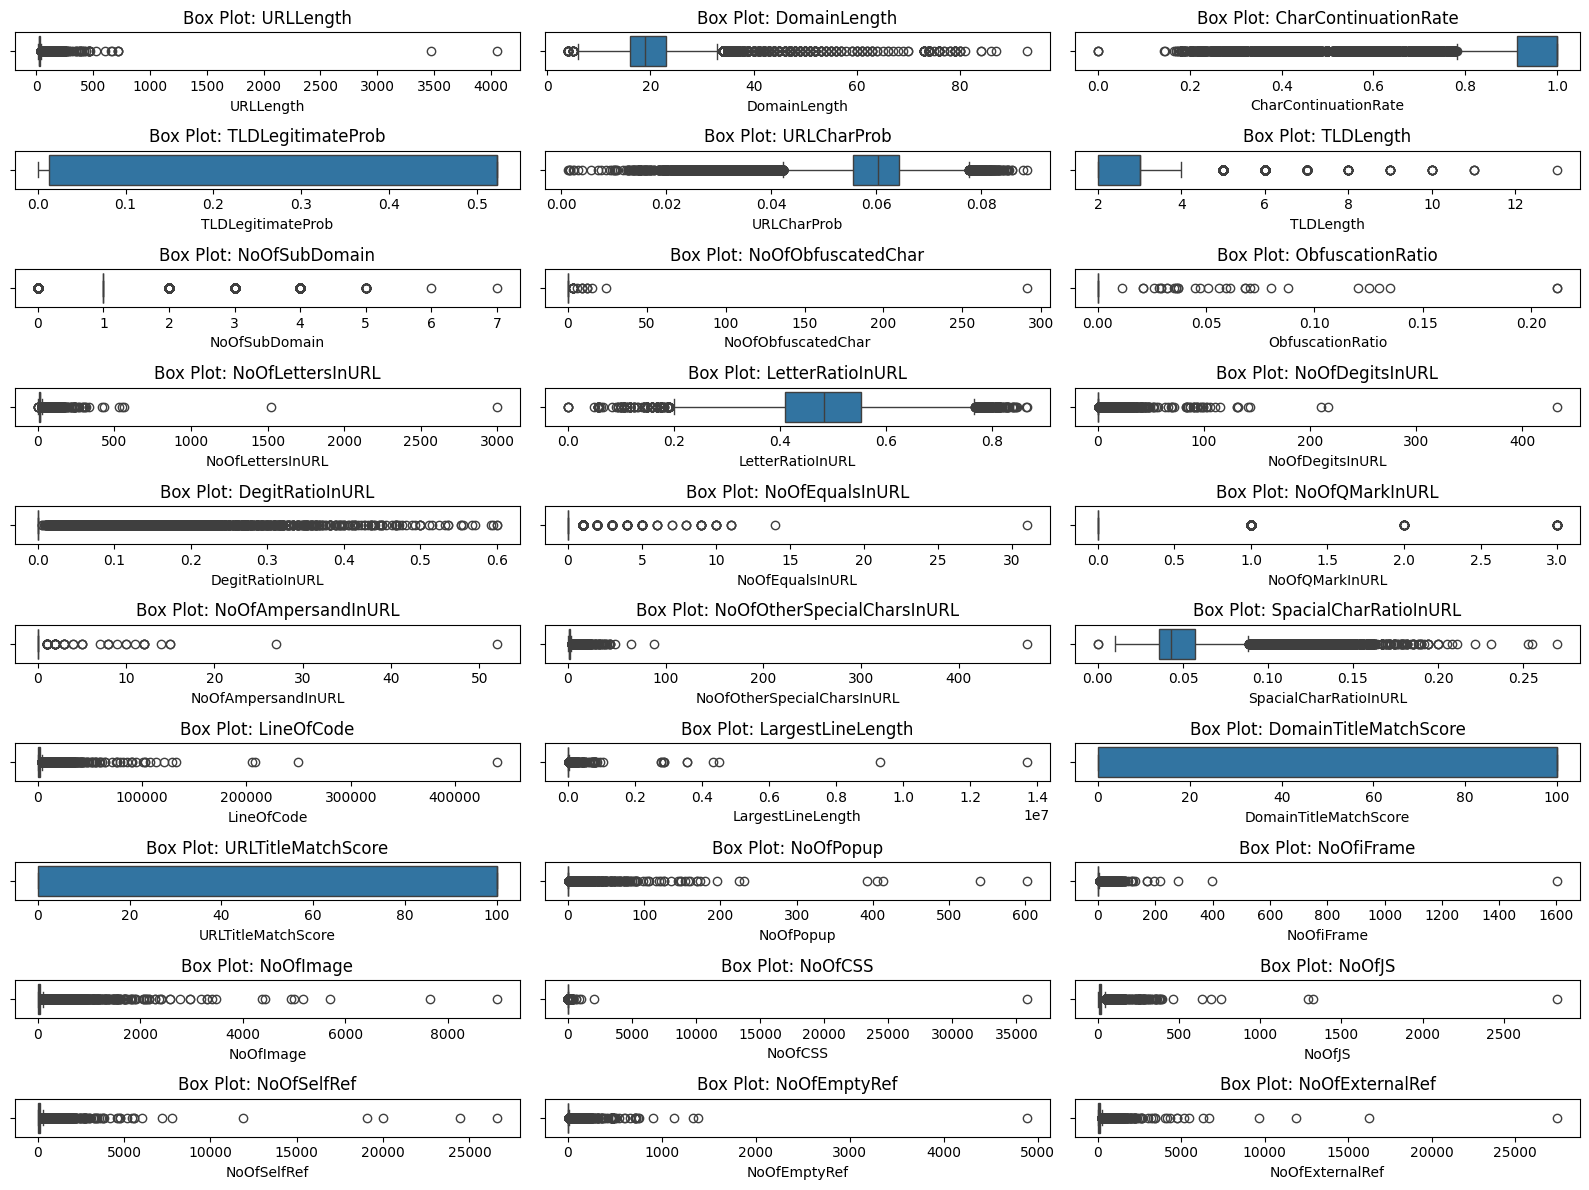

In [225]:
# Outliers visualization using box plots for non-categorical features
plt.figure(figsize=(16, 12))

for i, col in enumerate(df_train_non_cat.columns, 1):
    plt.subplot((len(df_train_non_cat.columns) + 2) // 3, 3, i)
    sns.boxplot(x=df_train_non_cat[col])
    plt.title(f"Box Plot: {col}")
    plt.tight_layout()

plt.show()


### 8. Correlations Between Features

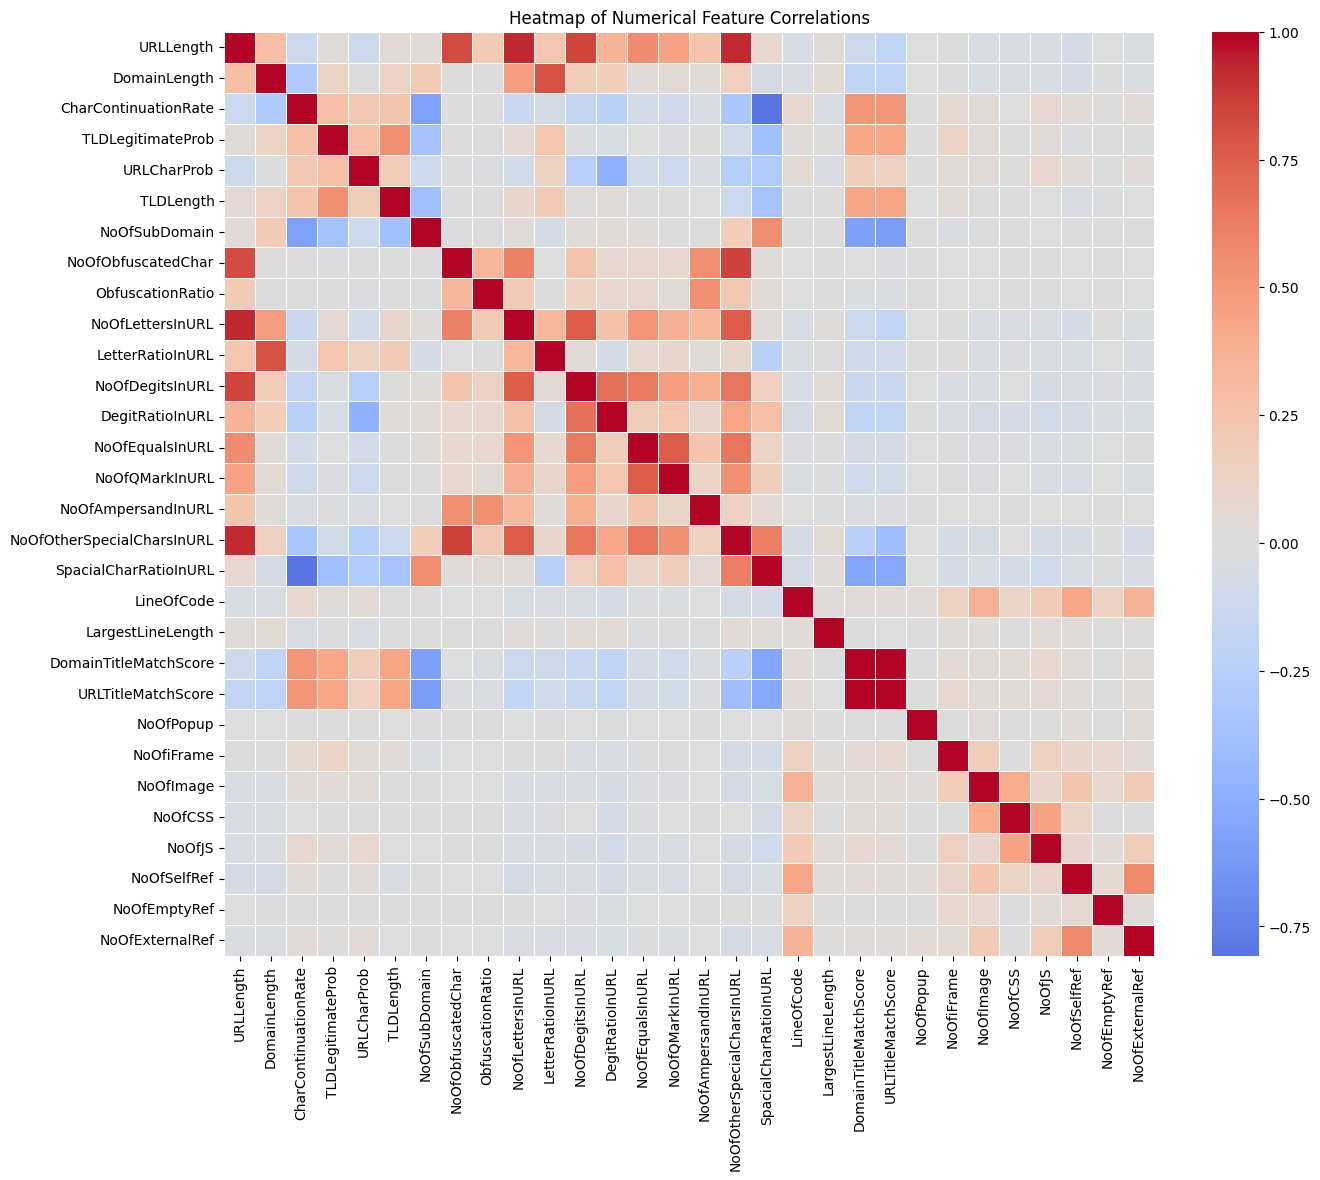

                            URLLength  DomainLength  CharContinuationRate  \
URLLength                    1.000000      0.289682             -0.124541   
DomainLength                 0.289682      1.000000             -0.299010   
CharContinuationRate        -0.124541     -0.299010              1.000000   
TLDLegitimateProb            0.025708      0.123278              0.286157   
URLCharProb                 -0.113507     -0.009943              0.227600   
TLDLength                    0.058677      0.124980              0.255948   
NoOfSubDomain                0.035948      0.205520             -0.580155   
NoOfObfuscatedChar           0.818319      0.001108             -0.000259   
ObfuscationRatio             0.200808      0.017593             -0.014896   
NoOfLettersInURL             0.934413      0.481225             -0.132395   
LetterRatioInURL             0.232996      0.801304             -0.063559   
NoOfDegitsInURL              0.848270      0.184768             -0.178424   

In [226]:
corr = df_train_non_cat.corr()

plt.figure(figsize=(15, 12))

sns.heatmap(corr, annot=False, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")

plt.title("Heatmap of Numerical Feature Correlations")
plt.show()

print(corr)

### 9. Distribution of Each Feature

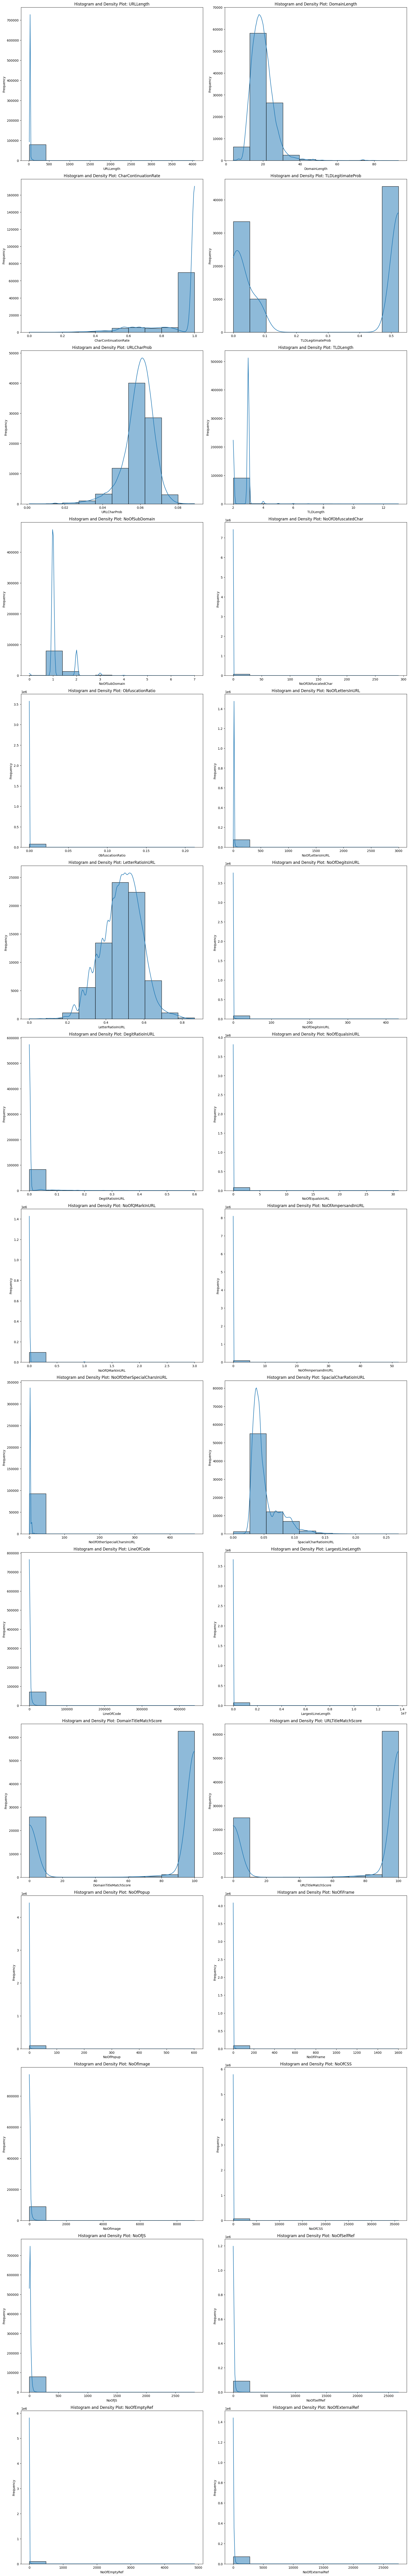

In [227]:
plt.figure(figsize=(18, len(non_cat_cols) * 4))

for i, col in enumerate(non_cat_cols, 1):
    plt.subplot((len(non_cat_cols) + 2) // 2, 2, i)
    sns.histplot(df_train[col], kde=True, bins=10)
    plt.title(f'Histogram and Density Plot: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()


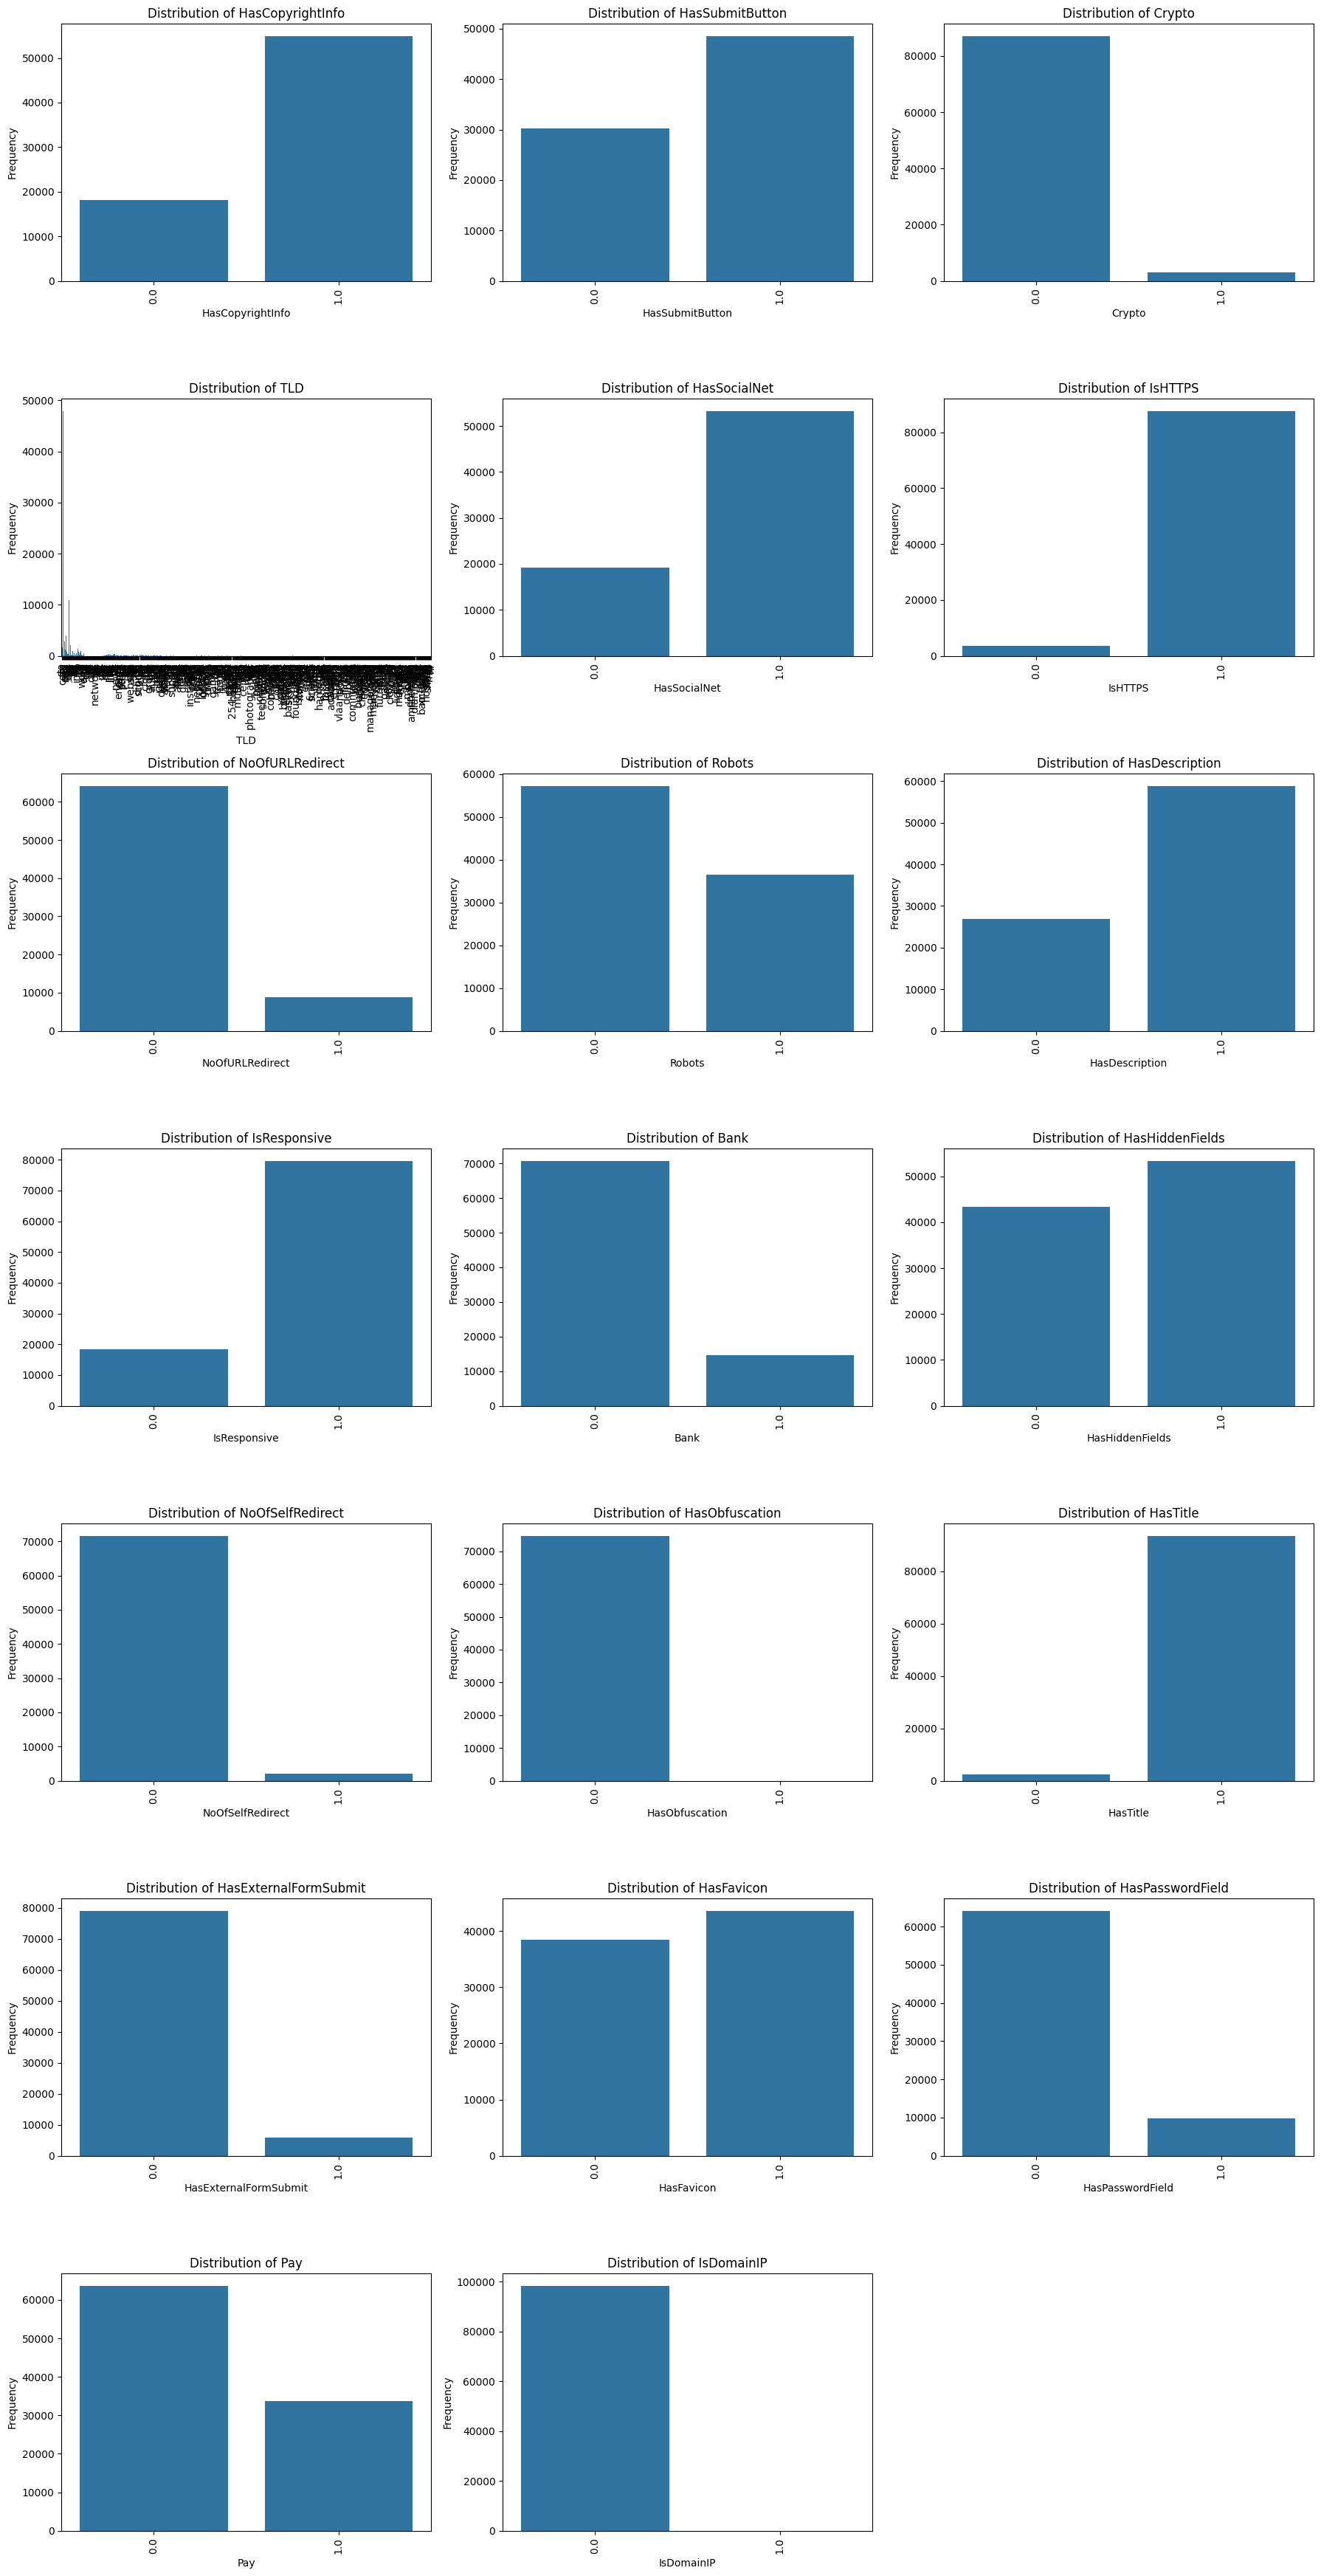

In [228]:
excluded_cols = ['Domain', 'URL', 'Title', 'FILENAME']

filtered_cat_cols = [col for col in cat_cols if col not in excluded_cols]

num_cols = len(filtered_cat_cols)
rows = (num_cols + 2) // 3
plt.figure(figsize=(18, rows * 5))

for i, col in enumerate(filtered_cat_cols, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=col, data=df_train)
    plt.xticks(rotation=90)
    plt.title(f"Distribution of {col}")
    plt.ylabel("Frequency")
    plt.xlabel(col)

plt.tight_layout()
plt.show()


### 10. Correlation Between Feature and Target

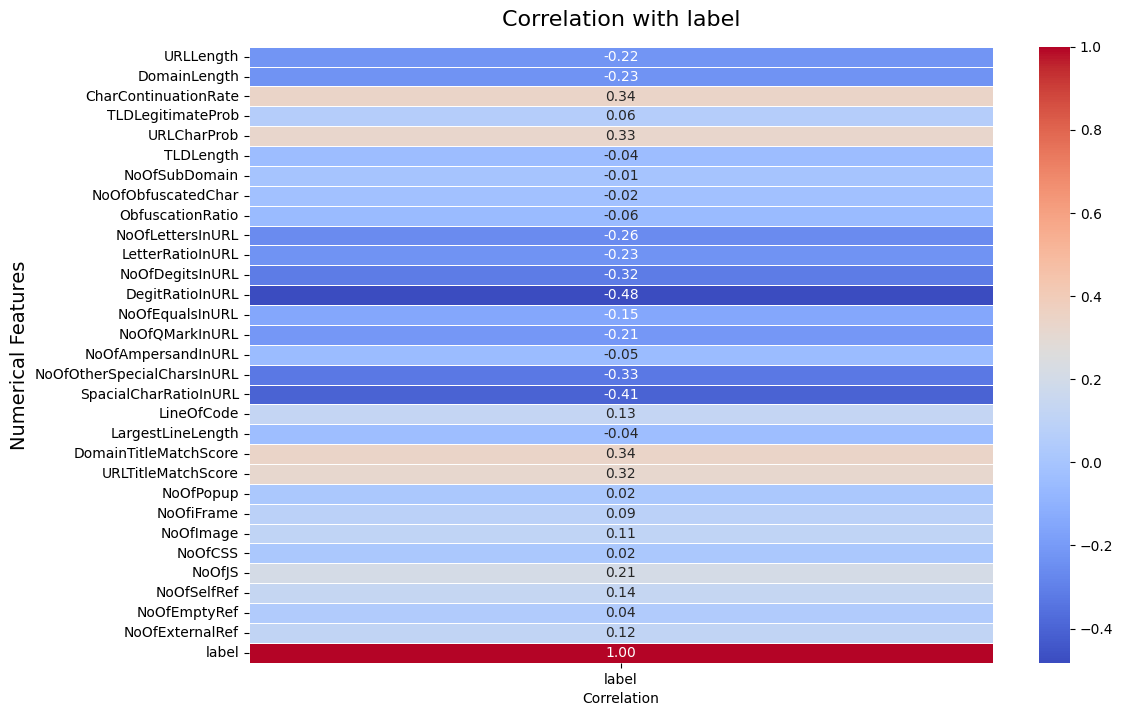

In [229]:
# Correlation between non catgorical and the target variable
def plot_correlation_heatmap(df, df_non_cat, target_col):
    correlation = df[non_cat_cols + [target_col]].corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(
        correlation[[target_col]],
        annot=True,
        cmap="coolwarm",
        cbar=True,
        fmt=".2f",
        linewidths=0.5
    )
    plt.title(f'Correlation with {target_col}', fontsize=16, pad=15)
    plt.xlabel('Correlation', fontsize=10)
    plt.ylabel('Numerical Features', fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

plot_correlation_heatmap(df_train, df_train_features, target_col)

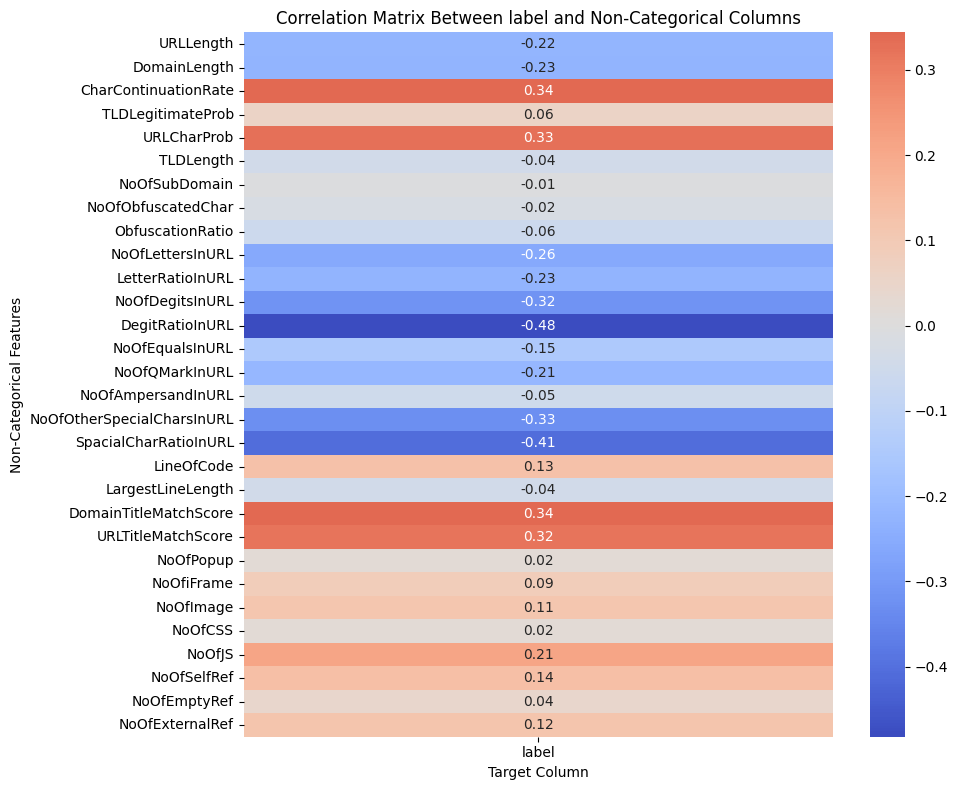

In [230]:
correlation_matrix = df_train[non_cat_cols + [target_col]].corr()

correlations = correlation_matrix[[target_col]].drop(index=target_col)

plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title(f"Correlation Matrix Between {target_col} and Non-Categorical Columns")
plt.xlabel("Target Column")
plt.ylabel("Non-Categorical Features")
plt.tight_layout()
plt.show()


- **Feature Correlation**: Identifies and removes redundant features.
- **Feature Distribution**: Highlights data concentration, patterns, and outliers.
- **Transformations**: Guides adjustments to improve model performance.
- **Feature-Target Relevance**: Pinpoints features most critical for predictions.
- **Purpose**: Enhances data quality and ensures the model focuses on valuable features.
"""


# 1. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [231]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...

ori_train_set = df_train.copy()

train_set, val_set = train_test_split(df_train, test_size=0.2, random_state=42)

print("Original train set size:", df_train.shape)
print("Train set size:", train_set.shape)
print("Validation set size:", val_set.shape)

Original train set size: (140404, 55)
Train set size: (112323, 55)
Validation set size: (28081, 55)


# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [232]:
features: list[str] = [col for col in train_set.columns if col not in ['id', 'label']]
train_set_features = train_set[features]
val_set_features = val_set[features]

binary_cols_train: list[str] = [col for col in train_set_features.columns if train_set_features[col].nunique() == 2]
cat_cols_train: list[str] = [col for col in train_set_features.columns if train_set_features[col].dtype == 'object']
cat_cols_train: list[str] = list(set(cat_cols_train) | set(binary_cols_train))

binary_cols_val: list[str] = [col for col in val_set_features.columns if val_set_features[col].nunique() == 2]
cat_cols_val: list[str] = [col for col in val_set_features.columns if val_set_features[col].dtype == 'object']
cat_cols_val: list[str] = list(set(cat_cols_val) | set(binary_cols_val))

train_set_cat = train_set[cat_cols_train]
val_set_cat = val_set[cat_cols_val]

target_col: str = 'label'
train_set_target = train_set[target_col]
val_set_target = val_set[target_col]

non_cat_cols_train: list[str] = [col for col in train_set_features.columns if col not in cat_cols_train]
non_cat_cols_val: list[str] = [col for col in val_set_features.columns if col not in cat_cols_val]

train_set_non_cat = train_set[non_cat_cols_train]
val_set_non_cat = val_set[non_cat_cols_val]

print(f"Train Categorical Columns ({len(cat_cols_train)}): {cat_cols_train}")
print(f"Train Non-Categorical Columns ({len(non_cat_cols_train)}): {non_cat_cols_train}")
print(f"Validation Categorical Columns ({len(cat_cols_val)}): {cat_cols_val}")
print(f"Validation Non-Categorical Columns ({len(non_cat_cols_val)}): {non_cat_cols_val}")
print(f"Target Column: {target_col}")


Train Categorical Columns (24): ['HasCopyrightInfo', 'HasSubmitButton', 'Crypto', 'TLD', 'HasSocialNet', 'IsHTTPS', 'NoOfURLRedirect', 'Robots', 'HasDescription', 'IsResponsive', 'Domain', 'Bank', 'HasHiddenFields', 'FILENAME', 'NoOfSelfRedirect', 'HasObfuscation', 'HasTitle', 'HasExternalFormSubmit', 'Title', 'HasFavicon', 'HasPasswordField', 'URL', 'Pay', 'IsDomainIP']
Train Non-Categorical Columns (30): ['URLLength', 'DomainLength', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'LineOfCode', 'LargestLineLength', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'NoOfPopup', 'NoOfiFrame', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef']
Validation Categorical Columns (24): ['HasC

In [233]:
def handle_missing_data(df, non_cat_features, cat_features) -> pd.DataFrame:

    missing_before = df.isnull().sum()

    num_imputer = SimpleImputer(strategy='mean')
    df[non_cat_features] = num_imputer.fit_transform(df[non_cat_features])

    cat_imputer = SimpleImputer(strategy='most_frequent')
    df[cat_features] = cat_imputer.fit_transform(df[cat_features])

    missing_after = df.isnull().sum()

    missing_summary = pd.DataFrame({
        'Before Imputation': missing_before,
        'After Imputation': missing_after
    })

    print(missing_summary)

    return df

train_set = handle_missing_data(train_set, non_cat_cols_train, cat_cols_train)
val_set = handle_missing_data(val_set, non_cat_cols_val, cat_cols_val)

                            Before Imputation  After Imputation
FILENAME                                45942                 0
URL                                     34672                 0
URLLength                               48513                 0
Domain                                  56165                 0
DomainLength                            36975                 0
IsDomainIP                              33678                 0
TLD                                     36286                 0
CharContinuationRate                    38384                 0
TLDLegitimateProb                       42428                 0
URLCharProb                             41769                 0
TLDLength                               38186                 0
NoOfSubDomain                           35398                 0
HasObfuscation                          52518                 0
NoOfObfuscatedChar                      53460                 0
ObfuscationRatio                        

We using mean for numerical data and mode for categorical data is effective and simple, preserving the dataset's distribution without adding complexity. It avoids arbitrary assumptions (as in constant value imputation) and prevents data loss (as in deletion). Scikit-Learn's SimpleImputer ensures easy and efficient implementation, making it a practical choice for handling random missing values.

### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [234]:
def iqr(data, feature):

    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = (data[feature] < lower_limit) | (data[feature] > upper_limit)
    outlier_count = outliers.sum()
    outlier_percentage = (outlier_count / len(data)) * 100

    clipped_feature = np.clip(data[feature], lower_limit, upper_limit)

    return clipped_feature, outlier_count, outlier_percentage, lower_limit, upper_limit

In [235]:
outlier_stats = []

for feature in non_cat_cols:
    train_set[feature], outlier_count_train, outlier_percentage_train, lower_limit_train, upper_limit_train = iqr(train_set, feature)
    val_set[feature], outlier_count_val, outlier_percentage_val, lower_limit_val, upper_limit_val = iqr(val_set, feature)

    outlier_stats.append({
        'feature': feature,
        'train_outliers': outlier_count_train,
        'train_percentage': outlier_percentage_train,
        'val_outliers': outlier_count_val,
        'val_percentage': outlier_percentage_val
    })

outlier_stats = sorted(outlier_stats, key=lambda x: x['train_percentage'], reverse=True)

for stats in outlier_stats:
    print(f"Feature: {stats['feature']}")
    print(f"Train Set - Outliers: {stats['train_outliers']}, Percentage: {stats['train_percentage']:.2f}%")
    print(f"Validation Set - Outliers: {stats['val_outliers']}, Percentage: {stats['val_percentage']:.2f}%")
    print('-' * 80)


Feature: LetterRatioInURL
Train Set - Outliers: 41433, Percentage: 36.89%
Validation Set - Outliers: 10416, Percentage: 37.09%
--------------------------------------------------------------------------------
Feature: TLDLength
Train Set - Outliers: 23307, Percentage: 20.75%
Validation Set - Outliers: 5887, Percentage: 20.96%
--------------------------------------------------------------------------------
Feature: NoOfLettersInURL
Train Set - Outliers: 23249, Percentage: 20.70%
Validation Set - Outliers: 5843, Percentage: 20.81%
--------------------------------------------------------------------------------
Feature: URLCharProb
Train Set - Outliers: 22644, Percentage: 20.16%
Validation Set - Outliers: 5475, Percentage: 19.50%
--------------------------------------------------------------------------------
Feature: DomainTitleMatchScore
Train Set - Outliers: 20770, Percentage: 18.49%
Validation Set - Outliers: 5178, Percentage: 18.44%
----------------------------------------------------

In [236]:
capping_features_train = []
capping_features_val = []
mean_imputation_features_train = []
mean_imputation_features_val = []
isolation_forest_features_train = []
isolation_forest_features_val = []

for stats in outlier_stats:
    feature = stats['feature']
    train_percentage = stats['train_percentage']
    val_percentage = stats['val_percentage']

    if feature in train_set.columns:
        if train_percentage > 5:
            capping_features_train.append(feature)
        elif 1 <= train_percentage <= 5:
            mean_imputation_features_train.append(feature)
        elif train_percentage < 1:
            isolation_forest_features_train.append(feature)

    if feature in val_set.columns:
        if val_percentage > 5:
            capping_features_val.append(feature)
        elif 1 <= val_percentage <= 5:
            mean_imputation_features_val.append(feature)
        elif val_percentage < 1:
            isolation_forest_features_val.append(feature)

print("Features to be handled by capping (outliers > 5%):")
print("Train Set:")
for feature in capping_features_train:
    print(f"- {feature}")
print("Validation Set:")
for feature in capping_features_val:
    print(f"- {feature}")
print('-' * 80)

print("Features to be handled by mean imputation (outliers 1-5%):")
print("Train Set:")
for feature in mean_imputation_features_train:
    print(f"- {feature}")
print("Validation Set:")
for feature in mean_imputation_features_val:
    print(f"- {feature}")
print('-' * 80)

print("Features to be handled by Isolation Forest (outliers < 1%):")
print("Train Set:")
for feature in isolation_forest_features_train:
    print(f"- {feature}")
print("Validation Set:")
for feature in isolation_forest_features_val:
    print(f"- {feature}")
print('-' * 80)

Features to be handled by capping (outliers > 5%):
Train Set:
- LetterRatioInURL
- TLDLength
- NoOfLettersInURL
- URLCharProb
- DomainTitleMatchScore
- NoOfJS
- URLTitleMatchScore
- URLLength
- SpacialCharRatioInURL
- CharContinuationRate
- NoOfSubDomain
- NoOfSelfRef
- NoOfExternalRef
- NoOfCSS
- LineOfCode
- NoOfImage
- NoOfPopup
- NoOfiFrame
- DomainLength
- NoOfEmptyRef
Validation Set:
- LetterRatioInURL
- TLDLength
- NoOfLettersInURL
- URLCharProb
- DomainTitleMatchScore
- NoOfJS
- URLTitleMatchScore
- URLLength
- SpacialCharRatioInURL
- CharContinuationRate
- NoOfSubDomain
- NoOfSelfRef
- NoOfExternalRef
- NoOfCSS
- LineOfCode
- NoOfImage
- NoOfPopup
- NoOfiFrame
- DomainLength
- NoOfEmptyRef
- LargestLineLength
--------------------------------------------------------------------------------
Features to be handled by mean imputation (outliers 1-5%):
Train Set:
- LargestLineLength
- NoOfOtherSpecialCharsInURL
- DegitRatioInURL
- NoOfDegitsInURL
Validation Set:
- NoOfOtherSpecialCh

In [237]:
def handle_outliers(train_set, val_set):
    """
    Handle outliers using pre-identified lists for capping, mean imputation, and Isolation Forest.
    """

    for feature in capping_features_train:
        print(f"Clipping outliers for feature (Train Set): {feature}")
        _, _, _, lower_limit_train, upper_limit_train = iqr(train_set, feature)
        train_set[feature] = np.clip(train_set[feature], lower_limit_train, upper_limit_train)

    for feature in capping_features_val:
        print(f"Clipping outliers for feature (Validation Set): {feature}")
        _, _, _, lower_limit_val, upper_limit_val = iqr(val_set, feature)
        val_set[feature] = np.clip(val_set[feature], lower_limit_val, upper_limit_val)

    for feature in mean_imputation_features_train:
        print(f"Imputing outliers with mean for feature (Train Set): {feature}")
        _, _, _, lower_limit_train, upper_limit_train = iqr(train_set, feature)
        mean_value = train_set[feature].mean()
        train_set[feature] = train_set[feature].apply(
            lambda x: mean_value if x < lower_limit_train or x > upper_limit_train else x
        )

    for feature in mean_imputation_features_val:
        print(f"Imputing outliers with mean for feature (Validation Set): {feature}")
        _, _, _, lower_limit_val, upper_limit_val = iqr(val_set, feature)
        mean_value = val_set[feature].mean()
        val_set[feature] = val_set[feature].apply(
            lambda x: mean_value if x < lower_limit_val or x > upper_limit_val else x
        )

    for feature in isolation_forest_features_train + isolation_forest_features_val:
        print(f"Applying Isolation Forest for feature: {feature}")
        iso_forest = IsolationForest(contamination=0.01, random_state=42, n_estimators=300)
        combined_data = pd.concat([train_set[feature], val_set[feature]], axis=0).to_frame()
        outlier_predictions = iso_forest.fit_predict(combined_data)
        outlier_mask = outlier_predictions == -1

        combined_data = combined_data[~outlier_mask]
        train_set = train_set.loc[train_set.index.intersection(combined_data.index)]
        val_set = val_set.loc[val_set.index.intersection(combined_data.index)]

        print(f"Isolation Forest removed {outlier_mask.sum()} outliers for feature: {feature}")

    return train_set, val_set

train_set, val_set = handle_outliers(train_set, val_set)


Clipping outliers for feature (Train Set): LetterRatioInURL
Clipping outliers for feature (Train Set): TLDLength
Clipping outliers for feature (Train Set): NoOfLettersInURL
Clipping outliers for feature (Train Set): URLCharProb
Clipping outliers for feature (Train Set): DomainTitleMatchScore
Clipping outliers for feature (Train Set): NoOfJS
Clipping outliers for feature (Train Set): URLTitleMatchScore
Clipping outliers for feature (Train Set): URLLength
Clipping outliers for feature (Train Set): SpacialCharRatioInURL
Clipping outliers for feature (Train Set): CharContinuationRate
Clipping outliers for feature (Train Set): NoOfSubDomain
Clipping outliers for feature (Train Set): NoOfSelfRef
Clipping outliers for feature (Train Set): NoOfExternalRef
Clipping outliers for feature (Train Set): NoOfCSS
Clipping outliers for feature (Train Set): LineOfCode
Clipping outliers for feature (Train Set): NoOfImage
Clipping outliers for feature (Train Set): NoOfPopup
Clipping outliers for feature (

In [238]:
#These are the outliers after handling them in the previous section (code)
outlier_st = []

for feature in non_cat_cols:
    train_set[feature], outlier_count_train, outlier_percentage_train, lower_limit_train, upper_limit_train = iqr(train_set, feature)
    val_set[feature], outlier_count_val, outlier_percentage_val, lower_limit_val, upper_limit_val = iqr(val_set, feature)

    outlier_st.append({
        'feature': feature,
        'train_outliers': outlier_count_train,
        'train_percentage': outlier_percentage_train,
        'val_outliers': outlier_count_val,
        'val_percentage': outlier_percentage_val
    })

outlier_st = sorted(outlier_st, key=lambda x: x['train_percentage'], reverse=True)

for stats in outlier_st:
    print(f"Feature: {stats['feature']}")
    print(f"Train Set - Outliers: {stats['train_outliers']}, Percentage: {stats['train_percentage']:.2f}%")
    print(f"Validation Set - Outliers: {stats['val_outliers']}, Percentage: {stats['val_percentage']:.2f}%")
    print('-' * 80)

Feature: URLCharProb
Train Set - Outliers: 12493, Percentage: 11.33%
Validation Set - Outliers: 3039, Percentage: 11.03%
--------------------------------------------------------------------------------
Feature: LineOfCode
Train Set - Outliers: 8055, Percentage: 7.31%
Validation Set - Outliers: 2063, Percentage: 7.49%
--------------------------------------------------------------------------------
Feature: LargestLineLength
Train Set - Outliers: 5334, Percentage: 4.84%
Validation Set - Outliers: 1422, Percentage: 5.16%
--------------------------------------------------------------------------------
Feature: URLLength
Train Set - Outliers: 0, Percentage: 0.00%
Validation Set - Outliers: 0, Percentage: 0.00%
--------------------------------------------------------------------------------
Feature: DomainLength
Train Set - Outliers: 0, Percentage: 0.00%
Validation Set - Outliers: 0, Percentage: 0.00%
--------------------------------------------------------------------------------
Feature: C

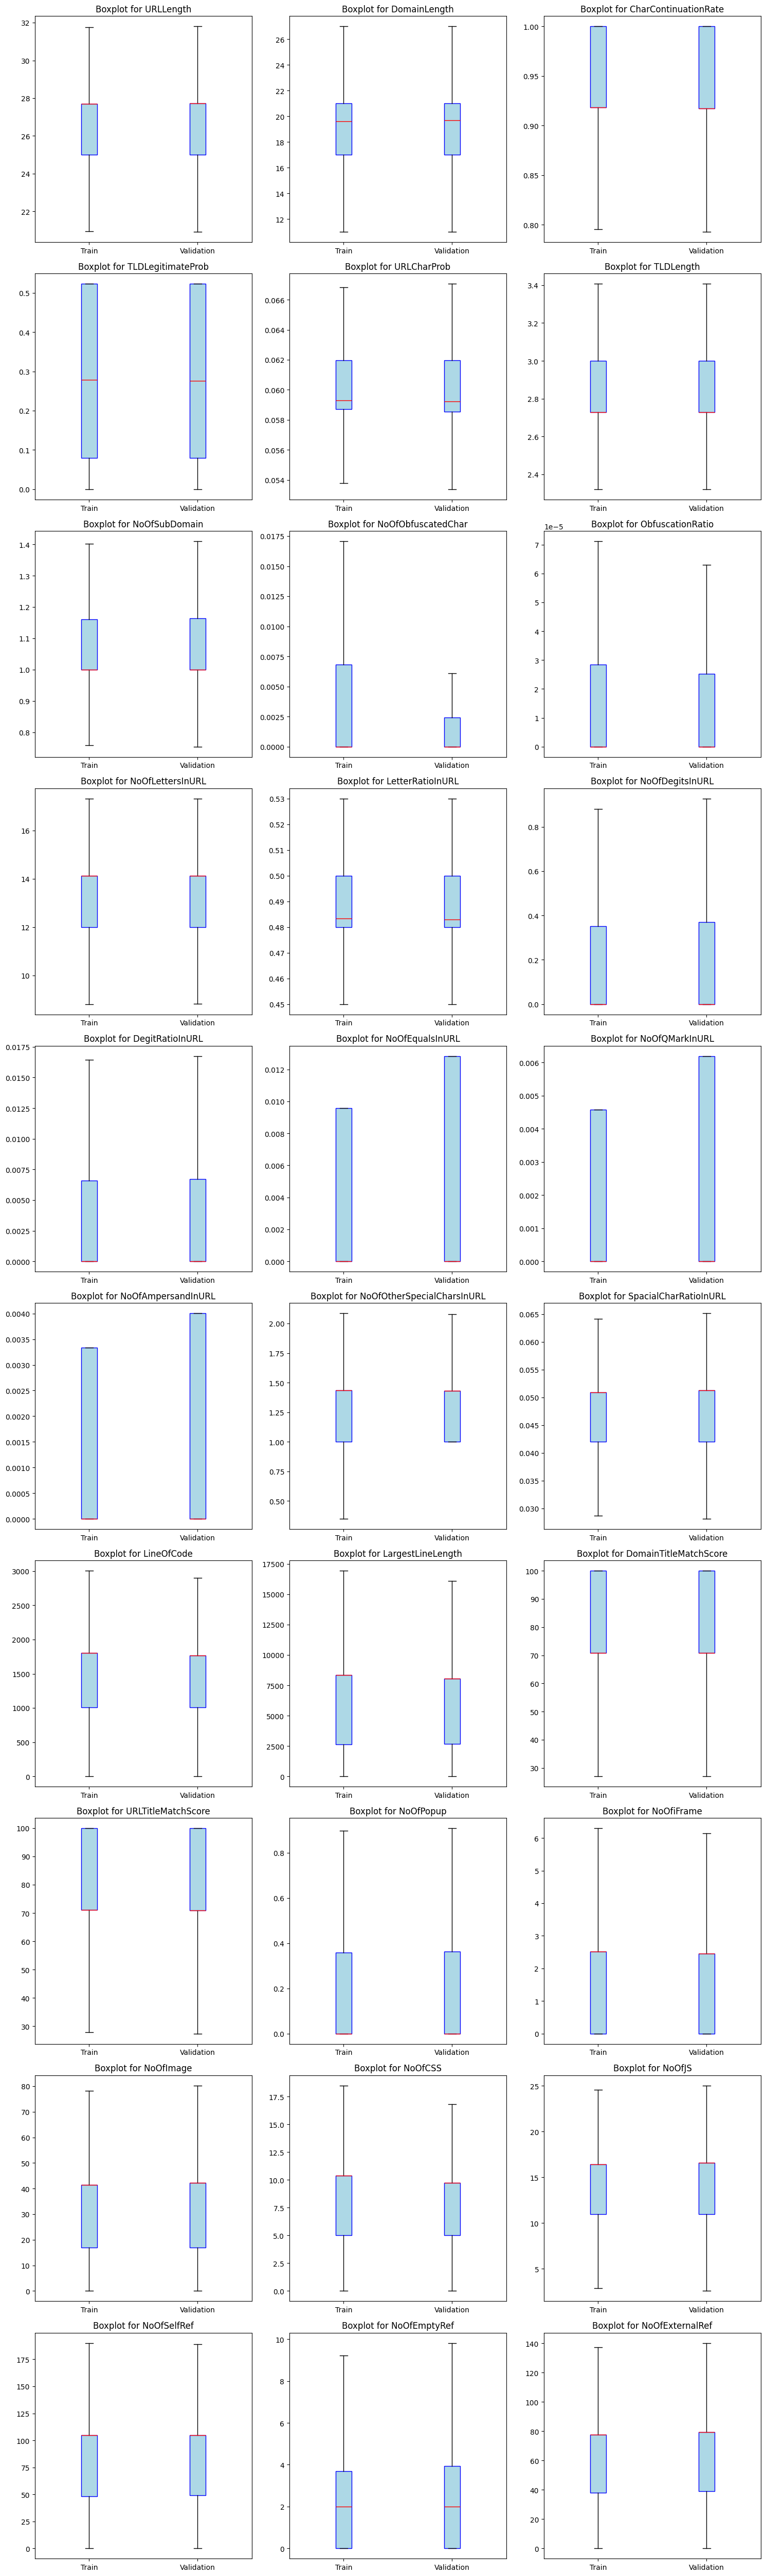

In [239]:
def boxplots(train_set, val_set, non_cat_cols):
    num_cols = len(non_cat_cols)
    fig, axes = plt.subplots(nrows=(num_cols // 3) + 1, ncols=3, figsize=(15, 5 * ((num_cols // 3) + 1)))
    axes = axes.flatten()

    for idx, col in enumerate(non_cat_cols):
        ax = axes[idx]
        ax.boxplot(
            [train_set[col].dropna(), val_set[col].dropna()],
            labels=['Train', 'Validation'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red')
        )
        ax.set_title(f'Boxplot for {col}')

    for idx in range(len(non_cat_cols), len(axes)):
        fig.delaxes(axes[idx])

    plt.tight_layout()
    plt.show()

boxplots(train_set, val_set, non_cat_cols)


### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [240]:
# before drop duplicates
print("Before drop duplicates in training set:", train_set.duplicated().sum())
print("Before drop duplicates in validation set:", val_set.duplicated().sum())

Before drop duplicates in training set: 0
Before drop duplicates in validation set: 0


Since there are no duplicate entries in the training and validation sets, no rows were removed

### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

### Remove Low Variance Features (JANGAN DI RUN)

In [241]:
#a = df_train_non_cat.corr()
#print(a)

In [242]:
#def remove_low_variance_features(data, non_cat_features, threshold=0.01) -> tuple[pd.DataFrame, int]:

    #selector = VarianceThreshold(threshold=threshold)

    #df_non_cat = data[non_cat_cols_val]
    #selector.fit(df_non_cat)

    #high_variance_features = df_non_cat.columns[selector.get_support()]
    #low_variance_features = set(non_cat_features) - set(high_variance_features)

    #data.drop(columns=low_variance_features, inplace=True)
    #non_cat_features = list(high_variance_features)

    #print(f"Removed low-variance features: {low_variance_features}")
    #print(f"After Removed low-variance features | non categorical features: {non_cat_features}")

    #return data, non_cat_features

In [243]:
#print(f"Removing Low Variance Features in Train Set")
#train_set, train_set_non_cat = remove_low_variance_features(train_set, train_set_non_cat)

#print('-' * 80)
#print(f"Removing Low Variance Features in Val Set")
#val_set, val_set_non_cat = remove_low_variance_features(val_set, val_set_non_cat)


### Removing Redundant Columns

In [244]:
#train_set_non_cat = train_set[train_set_non_cat]

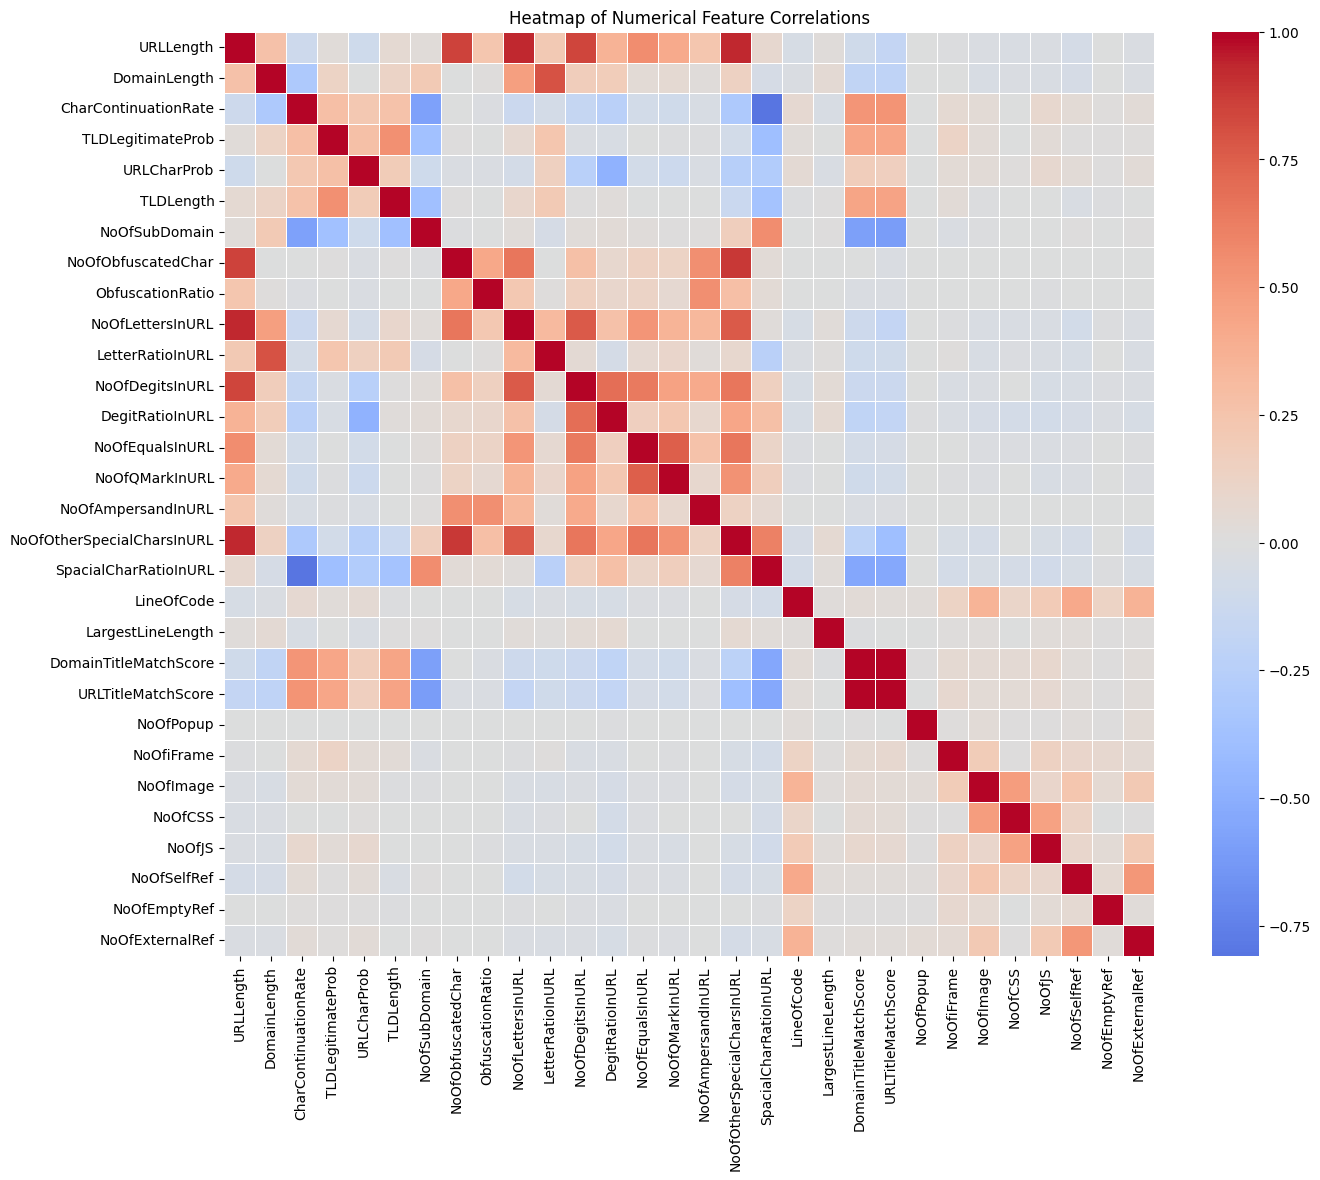

                            URLLength  DomainLength  CharContinuationRate  \
URLLength                    1.000000      0.267522             -0.113010   
DomainLength                 0.267522      1.000000             -0.301279   
CharContinuationRate        -0.113010     -0.301279              1.000000   
TLDLegitimateProb            0.026164      0.128196              0.285859   
URLCharProb                 -0.105732     -0.005332              0.222631   
TLDLength                    0.057957      0.122679              0.258770   
NoOfSubDomain                0.031057      0.207333             -0.580368   
NoOfObfuscatedChar           0.852847      0.000277             -0.000413   
ObfuscationRatio             0.238917      0.014224             -0.021529   
NoOfLettersInURL             0.931883      0.470215             -0.123912   
LetterRatioInURL             0.213135      0.800743             -0.068558   
NoOfDegitsInURL              0.849284      0.177441             -0.166090   

In [245]:
corr =  train_set_non_cat.corr()
plt.figure(figsize=(15, 12))

sns.heatmap(corr, annot=False, cmap='coolwarm', center=0, linewidths=0.5, fmt=".2f")

plt.title("Heatmap of Numerical Feature Correlations")
plt.show()

print(corr)

In [246]:
for c in corr.columns:
    corr_c = corr[c]
    corr_c = corr_c[((corr_c > 0.75) & (corr_c < 1)) | ((corr_c < -0.75) & (corr_c > -1))].dropna()
    if not corr_c.empty:
        print(f"\nCorrelation for Feature '{c}':")
        print(corr_c.sort_values(ascending=False))



Correlation for Feature 'URLLength':
NoOfLettersInURL              0.931883
NoOfOtherSpecialCharsInURL    0.931825
NoOfObfuscatedChar            0.852847
NoOfDegitsInURL               0.849284
Name: URLLength, dtype: float64

Correlation for Feature 'DomainLength':
LetterRatioInURL    0.800743
Name: DomainLength, dtype: float64

Correlation for Feature 'CharContinuationRate':
SpacialCharRatioInURL   -0.809027
Name: CharContinuationRate, dtype: float64

Correlation for Feature 'NoOfObfuscatedChar':
NoOfOtherSpecialCharsInURL    0.882249
URLLength                     0.852847
Name: NoOfObfuscatedChar, dtype: float64

Correlation for Feature 'NoOfLettersInURL':
URLLength                     0.931883
NoOfDegitsInURL               0.769569
NoOfOtherSpecialCharsInURL    0.767382
Name: NoOfLettersInURL, dtype: float64

Correlation for Feature 'LetterRatioInURL':
DomainLength    0.800743
Name: LetterRatioInURL, dtype: float64

Correlation for Feature 'NoOfDegitsInURL':
URLLength           0.8

In [247]:
print("Highly Correlated Features (Positive and Negative):")
high_corr_pairs = []
for col in corr.columns:
    corr_c = corr[col]

    corr_c = corr_c[((corr_c > 0.75) & (corr_c < 1)) | ((corr_c < -0.75) & (corr_c > -1))].dropna()
    for idx in corr_c.index:

        if (idx, col) not in high_corr_pairs and (col, idx) not in high_corr_pairs:
            high_corr_pairs.append((col, idx))
            print(f"{col} - {idx}: {corr_c[idx]:.2f}")

if not high_corr_pairs:
    print("No features with high positive or negative correlation found.")

Highly Correlated Features (Positive and Negative):
URLLength - NoOfObfuscatedChar: 0.85
URLLength - NoOfLettersInURL: 0.93
URLLength - NoOfDegitsInURL: 0.85
URLLength - NoOfOtherSpecialCharsInURL: 0.93
DomainLength - LetterRatioInURL: 0.80
CharContinuationRate - SpacialCharRatioInURL: -0.81
NoOfObfuscatedChar - NoOfOtherSpecialCharsInURL: 0.88
NoOfLettersInURL - NoOfDegitsInURL: 0.77
NoOfLettersInURL - NoOfOtherSpecialCharsInURL: 0.77
DomainTitleMatchScore - URLTitleMatchScore: 0.99


During the correlation analysis, several numerical features exhibit high correlations (greater than 0.75 or less than -0.75). High correlation indicates that these features are redundant or provide overlapping information, which can negatively impact the model's performance.

1. URLLength:
Highly correlated with NoOfLettersInURL, NoOfOtherSpecialCharsInURL, NoOfObfuscatedChar, and NoOfDegitsInURL.
2. DomainLength:
Highly correlated with LetterRatioInURL.
3. CharContinuationRate:
Strong negative correlation with SpacialCharRatioInURL.
4. NoOfObfuscatedChar:
Highly correlated with NoOfOtherSpecialCharsInURL and URLLength.
5. NoOfLettersInURL:
Highly correlated with URLLength and NoOfDegitsInURL.
6. LetterRatioInURL:
Highly correlated with DomainLength.
7. NoOfDegitsInURL:
Highly correlated with URLLength and NoOfLettersInURL.
8. NoOfOtherSpecialCharsInURL:
Highly correlated with URLLength, NoOfObfuscatedChar, and NoOfLettersInURL.
9. SpacialCharRatioInURL:
Strong negative correlation with CharContinuationRate.
10. DomainTitleMatchScore:
Almost perfectly correlated with URLTitleMatchScore.
11. URLTitleMatchScore:
Almost perfectly correlated with DomainTitleMatchScore.

Based on the results, we can drop the following features to reduce multicollinearity:

1. NoOfLettersInURL (Highly correlated with URLLength).
2. NoOfOtherSpecialCharsInURL (Highly correlated with URLLength and NoOfObfuscatedChar).
3. NoOfObfuscatedChar (Redundant due to correlation with URLLength).
4. NoOfDegitsInURL (Highly correlated with URLLength and NoOfLettersInURL).
5. LetterRatioInURL (Highly correlated with DomainLength).
6. SpacialCharRatioInURL (Strong negative correlation with CharContinuationRate).
7. URLTitleMatchScore (Almost perfectly correlated with DomainTitleMatchScore).

In [248]:
features_to_drop = [
    'NoOfLettersInURL',
    'NoOfOtherSpecialCharsInURL',
    'NoOfObfuscatedChar',
    'NoOfDegitsInURL',
    'LetterRatioInURL',
    'SpacialCharRatioInURL',
    'URLTitleMatchScore'
]

train_set = train_set.drop(columns=features_to_drop)
val_set = val_set.drop(columns=features_to_drop)

print("Dropped features:", features_to_drop)

Dropped features: ['NoOfLettersInURL', 'NoOfOtherSpecialCharsInURL', 'NoOfObfuscatedChar', 'NoOfDegitsInURL', 'LetterRatioInURL', 'SpacialCharRatioInURL', 'URLTitleMatchScore']


## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [249]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [250]:
#class FeatureScaler(BaseEstimator, TransformerMixin):
    #def __init__(self):
        #self.scaler = StandardScaler()

    #def fit(self, X, y=None):
        #self.scaler.fit(X)
        #return self

    #def transform(self, X):
        #return pd.DataFrame(self.scaler.transform(X), columns=X.columns)

In [251]:
class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.standard_scaler = StandardScaler()

    def fit(self, X, y=None):
        self.standard_scaler.fit(X)
        return self

    def transform(self, X):
        X_scaled = self.standard_scaler.transform(X)
        X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
        return X_scaled_df

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [252]:
#class FeatureEncoder(BaseEstimator, TransformerMixin):
    #def __init__(self, label_unknown="unknown"):
        #self.encoders = {}
        #self.label_unknown = label_unknown

    #def fit(self, X, y=None):
        #for column in X.select_dtypes(include=['object']).columns:
            #label_encoder = LabelEncoder()
            #distinct_values = X[column].unique().tolist()
            #if self.label_unknown not in distinct_values:
                #distinct_values.append(self.label_unknown)
            #label_encoder.fit(distinct_values)
            #self.encoders[column] = label_encoder
        #return self

    #def transform(self, X):
        #X_encoded = X.copy()
        #for column, encoder in self.encoders.items():
            #X_encoded[column] = X_encoded[column].apply(
                #lambda value: value if value in encoder.classes_ else self.label_unknown
            #)
            #X_encoded[column] = encoder.transform(X_encoded[column])
        #return X_encoded


In [253]:
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, unknown_label="unknown"):
        self.encoders = {}
        self.unknown_label = unknown_label

    def fit(self, X, y=None):
        for feature in X.select_dtypes(include=['object']).columns:
            unique_values = set(X[feature])
            if self.unknown_label not in unique_values:
                unique_values.add(self.unknown_label)

            encoder = LabelEncoder()
            encoder.fit(list(unique_values))
            self.encoders[feature] = encoder
        return self

    def transform(self, X):
        transformed_X = X.copy()

        for feature in self.encoders:
            if feature in transformed_X.columns:
                transformed_X[feature] = transformed_X[feature].map(
                    lambda val: val if val in self.encoders[feature].classes_ else self.unknown_label
                )
                transformed_X[feature] = self.encoders[feature].transform(transformed_X[feature])

        return transformed_X


### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [254]:
train_set['label'].value_counts()

,count
label,
1,102441
0,7805



To optimize the training process and SMOTE, the number of samples for the majority class (label 1) was increased fivefold, from 102,441 to 35,000. This increase was done using random sampling to maintain the data's representativeness. By doing so, computational time was reduced, class balance was preserved using SMOTE, and model efficiency was improved without significantly affecting performance.

The choice of random_state=42 ensures the reproducibility of the random sampling process. Using this specific value guarantees that every run of the code with the same dataset will produce identical results.

In [255]:
target_samples = {
    '1': 3500,
    '0': 780
}

sampled_data = []

train_set['label'] = train_set['label'].astype(str)

for category in train_set['label'].unique():
    category_data = train_set[train_set['label'] == category]
    target = target_samples.get(category, len(category_data))

    if target >= len(category_data):
        sampled_data.append(category_data)
    else:
        sampled_data.append(category_data.sample(n=target, random_state=42))

train_set_reduced = pd.concat(sampled_data, axis=0)

print("Distribution after reduction:")
print(train_set_reduced['label'].value_counts())

train_set = train_set_reduced

Distribution after reduction:
label
1    3500
0     780
Name: count, dtype: int64


In [256]:
class HandleImbalance(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.smote = SMOTE(random_state=42)

    def fit(self, X, y=None):
        self.X_balanced, self.y_balanced = self.smote.fit_resample(X, y)
        return self

    def transform(self, X, y=None):
        return X

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [257]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

# pipe = Pipeline([("imputer", FeatureImputer()),
#                  ("featurecreator", FeatureCreator()),
#                  ("scaler", FeatureScaler()),
#                  ("encoder", FeatureEncoder())])

# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

In [258]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

In [259]:
knn_model_pipeline = Pipeline([

    ('categorical_encoding', FeatureEncoder()),
    ('feature_scaling', FeatureScaler()),
    ('smote_resampling', HandleImbalance())
])

gnb_model_pipeline = Pipeline([
    ('categorical_encoding', FeatureEncoder()),
    ('smote_resampling', HandleImbalance())
])

In [260]:
for feature in cat_cols:
    val_set[feature] = val_set[feature].where(val_set[feature].isin(train_set[feature].unique()), 'unknown')

In [261]:
X_train_knn_model = knn_model_pipeline.fit(train_set.drop(columns=['label']), train_set['label']).transform(train_set.drop(columns=['label']))
X_val_knn_model = knn_model_pipeline.transform(val_set.drop(columns=['label']))
y_train_knn_model, y_val_knn_model = train_set['label'], val_set['label']

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other method

In [262]:
X_train_gnb_model = gnb_model_pipeline.fit(train_set.drop(columns=['label']), train_set['label']).transform(train_set.drop(columns=['label']))
X_val_gnb_model = gnb_model_pipeline.transform(val_set.drop(columns=['label']))
y_train_gnb_model, y_val_gnb_model = train_set['label'], val_set['label']

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other method

In [263]:
X_val_knn_model = X_val_knn_model.apply(pd.to_numeric, errors='coerce')


# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `label`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. KNN

In [264]:
import numpy as np
class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def manhattan_distance(self, x1, x2):
        return np.sum(np.abs(x1 - x2))

    def minkowski_distance(self, x1, x2, p=1):
        return np.sum(np.abs(x1 - x2) ** p) ** (1 / p)

    def predict(self, X, dist_metric="Euclidean"):
        X = np.array(X)
        y_pred = [self._predict(x, dist_metric) for x in X]
        return np.array(y_pred)

    def _predict(self, x, dist_metric):
        x = np.array(x)
        # Compute distances between x and all examples in the training set
        if dist_metric == "Euclidean":
            distances = [self.euclidean_distance(x, X_train) for X_train in self.X_train]
        elif dist_metric == "Manhattan":
            distances = [self.manhattan_distance(x, X_train) for X_train in self.X_train]
        elif dist_metric == "Minkowski":
            distances = [self.minkowski_distance(x, X_train) for X_train in self.X_train]

        # Sort by distance and return indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.k]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common


In [265]:
from sklearn.metrics import classification_report
import pickle

# Create a KNN classifier with k=3
knn = KNN(k=3)

# Fit the model using existing data
knn.fit(X_train_knn_model, y_train_knn_model)

with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)

# Predict all validation data with Euclidean distance
predictions = knn.predict(X_val_knn_model, dist_metric="Euclidean")

print(classification_report(y_val_knn_model, predictions))

              precision    recall  f1-score   support

           0       0.88      0.33      0.48      1981
           1       0.95      1.00      0.97     25566

    accuracy                           0.95     27547
   macro avg       0.91      0.67      0.73     27547
weighted avg       0.95      0.95      0.94     27547



In [266]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_knn_model, y_train_knn_model)

predictions = knn.predict(X_val_knn_model)

predictions = predictions.astype(int)

print(classification_report(y_val_knn_model, predictions))

              precision    recall  f1-score   support

           0       0.88      0.33      0.48      1981
           1       0.95      1.00      0.97     25566

    accuracy                           0.95     27547
   macro avg       0.91      0.67      0.73     27547
weighted avg       0.95      0.95      0.94     27547



## B. Naive Bayes

In [267]:
print(X_train_gnb_model.shape, y_train_gnb_model.shape)
print(X_val_gnb_model.shape, y_val_gnb_model.shape)

print(y_train_gnb_model.value_counts())

(4280, 47) (4280,)
(27547, 47) (27547,)
label
1    3500
0     780
Name: count, dtype: int64


In [268]:
X_train = X_train_gnb_model.astype(int)
X_val = X_val_gnb_model.astype(int)
y_train = y_train_gnb_model.astype(int)
y_val = y_val_gnb_model.astype(int)
print(X_val.shape)

(27547, 47)


In [269]:
class GaussianNaiveBayes:
    def __init__(self):
        self.classes = None
        self.mean = None
        self.var = None
        self.priors = None

    def fit(self, X, y):
        n_samples, features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        self.mean = np.zeros((n_classes, features))
        self.var = np.zeros((n_classes, features))
        self.priors = np.zeros(n_classes)

        for idx, cls in enumerate(self.classes):
            X_cls = X[y == cls]
            self.mean[idx, :] = np.mean(X_cls, axis=0)
            self.var[idx, :] = np.var(X_cls, axis=0)
            self.priors[idx] = X_cls.shape[0] / n_samples

    def _gaussian_likelihood(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx] + 1e-9
        numerator = np.exp(-(x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def _posterior(self, x):
        posteriors = []
        for idx, cls in enumerate(self.classes):
            prior = np.log(self.priors[idx])
            likelihood = np.sum(np.log(self._gaussian_likelihood(idx, x)))
            posterior = prior + likelihood
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        if not isinstance(X, np.ndarray):
            X = np.array(X)
        X = X.astype(float)
        y_pred = [self._posterior(x) for x in X]
        return np.array(y_pred)

    def get_params(self, deep=True):
        return {}

In [270]:
gnb = GaussianNaiveBayes()
gnb.fit(X_train, y_train)

with open('gnb_model.pkl', 'wb') as file:
    pickle.dump(gnb, file)

y_pred = gnb.predict(X_val).astype(int)


<ipython-input-269-a1b4394f8ec2>:33: RuntimeWarning: divide by zero encountered in log
  likelihood = np.sum(np.log(self._gaussian_likelihood(idx, x)))


In [271]:
accuracy = np.mean(y_pred == y_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.09      0.16      1981
           1       0.93      1.00      0.97     25566

    accuracy                           0.93     27547
   macro avg       0.97      0.54      0.56     27547
weighted avg       0.94      0.93      0.91     27547



In [272]:
# Gaussian Naive-Bayes implementation using Scikit-learn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

gnb_mdl = GaussianNB()
gnb_mdl.fit(X_train, y_train)

y_predSklearn = gnb_mdl.predict(X_val).astype(int)

In [273]:
accuracy = np.mean(y_predSklearn == y_val)
print(classification_report(y_val, y_predSklearn))

              precision    recall  f1-score   support

           0       1.00      0.04      0.08      1981
           1       0.93      1.00      0.96     25566

    accuracy                           0.93     27547
   macro avg       0.97      0.52      0.52     27547
weighted avg       0.94      0.93      0.90     27547



## C. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

### Hyperparameters Explors

In [274]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_knn_model, y_train_knn_model)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Best score: 0.9598130841121495


In [275]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('gnb', GaussianNB())
])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_val)

### Cross Validation

In [276]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# K-fold cross-validation for KNN
cv = StratifiedKFold(n_splits=5)
knn = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn, X_train_knn_model, y_train_knn_model, cv=cv, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.92523364 0.92056075 0.92640187 0.93691589 0.92406542]
Mean CV accuracy: 0.9266355140186917


In [277]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_knn_model, y_train_knn_model)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


## D. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `label` column.

Note: Adjust step 1 and 2 to your implementation of the preprocessing step if you don't use pipeline API from `sklearn`.

In [278]:
df_test = pd.read_csv('https://gist.githubusercontent.com/RunningPie/62a453218bd691c00d695f4d1fa05f38/raw/b9214382e6007dd6e267d7693e400e36c0fe4d77/test.csv')

In [279]:
df_test.head()

,id,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,CharContinuationRate,TLDLegitimateProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,48,80851.txt,https://www.iaee.org,19.0,NaN,12.0,0.0,org,NaN,0.079963,...,1.0,0.0,0.0,1.0,NaN,NaN,13.0,194.0,NaN,65.0
1,68,mw130480.txt,http://www.iran-edi.com,22.0,NaN,16.0,NaN,NaN,0.625000,NaN,...,NaN,NaN,0.0,NaN,0.0,NaN,2.0,0.0,0.0,1.0
2,76,400382.txt,https://www.bistum-chur.ch,25.0,www.bistum-chur.ch,18.0,0.0,ch,0.636364,0.004983,...,NaN,NaN,0.0,1.0,5.0,12.0,18.0,193.0,NaN,196.0
3,155,625297.txt,https://www.numberthreebath.com,30.0,NaN,23.0,NaN,com,1.000000,0.522907,...,0.0,0.0,NaN,NaN,NaN,1.0,10.0,12.0,0.0,11.0
4,167,8123642.txt,https://ipfs.litnet.work/ipfs/bafybeib5jvxytzb...,100.0,ipfs.litnet.work,NaN,0.0,work,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [280]:
import pickle

# Load the saved model
with open('knn_model.pkl', 'rb') as file:
    knn = pickle.load(file)

print("Model loaded successfully from 'knn_model.pkl'")


Model loaded successfully from 'knn_model.pkl'


In [281]:
import pickle

with open('gnb_model.pkl', 'rb') as file:
    gnb = pickle.load(file)

print("Model loaded successfully from 'gnb_model.pkl'")


Model loaded successfully from 'gnb_model.pkl'


In [282]:
X = ori_train_set.drop(columns=target_col)
Y = ori_train_set[target_col]

X, _, Y, _ = train_test_split(
    X, Y,
    train_size=5000,
    stratify=Y,
    random_state=42
)

Y = Y.values.ravel()
selected_columns = ori_train_set.columns.drop(target_col)
X_test = df_test[selected_columns]

In [285]:
from datetime import datetime
class DropFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_drop):
        self.features_to_drop = features_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.features_to_drop)

class HandleMissingData(BaseEstimator, TransformerMixin):
    def __init__(self, non_cat_features, cat_features):
        self.non_cat_features = non_cat_features
        self.cat_features = cat_features
        self.num_imputer = SimpleImputer(strategy='mean')
        self.cat_imputer = SimpleImputer(strategy='most_frequent')

    def fit(self, X, y=None):
        self.num_imputer.fit(X[self.non_cat_features])
        self.cat_imputer.fit(X[self.cat_features])
        return self

    def transform(self, X):
        X[self.non_cat_features] = self.num_imputer.transform(X[self.non_cat_features])
        X[self.cat_features] = self.cat_imputer.transform(X[self.cat_features])
        return X

features_to_drop = [

]

knn_model_pipeline = Pipeline([
    ('drop_features', DropFeatures(features_to_drop=features_to_drop)),
    ('missing_data', HandleMissingData(non_cat_features=non_cat_cols_train, cat_features=cat_cols_train)),
    ('categorical_encoding', FeatureEncoder()),
    ('feature_scaling', FeatureScaler()),
    ('smote_resampling', HandleImbalance())
])


def handle_submit(model, path, pipeline):
    X_original = pipeline.fit_transform(X, Y)

    X_test_transformed = pipeline.transform(X_test)

    model.fit(X_original, Y)

    y_pred = model.predict(X_test_transformed)

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    unique_name = f"knn_model_{timestamp}"

    with open(f"{unique_name}.pkl", 'wb') as file:
        pickle.dump(model, file)

    test_ids = df_test['id'].values
    submission_df = pd.DataFrame({
        "id": test_ids,
        "label": y_pred
    })
    csv_filename = f"{unique_name}_submission.csv"
    submission_df.to_csv(csv_filename, index=False)
    print(f"Predictions saved as {csv_filename}")
    display(submission_df)


In [286]:
handle_submit(knn, 'knn_model.pkl', knn_model_pipeline)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other method

Predictions saved as knn_model_20241222_155211_submission.csv


,id,label
0,48,1
1,68,1
2,76,1
3,155,1
4,167,0
...,...,...
9995,235694,1
9996,235718,1
9997,235733,1
9998,235740,1


In [296]:
class DropFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_drop):
        self.features_to_drop = features_to_drop

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.drop(columns=self.features_to_drop)

class HandleMissingData(BaseEstimator, TransformerMixin):
    def __init__(self, non_cat_features, cat_features):
        self.non_cat_features = non_cat_features
        self.cat_features = cat_features
        self.num_imputer = SimpleImputer(strategy='mean')
        self.cat_imputer = SimpleImputer(strategy='most_frequent')

    def fit(self, X, y=None):
        self.num_imputer.fit(X[self.non_cat_features])
        self.cat_imputer.fit(X[self.cat_features])
        return self

    def transform(self, X):
        X[self.non_cat_features] = self.num_imputer.transform(X[self.non_cat_features])
        X[self.cat_features] = self.cat_imputer.transform(X[self.cat_features])
        return X

features_to_drop = [

]

gnb_model_pipeline = Pipeline([
    ('drop_features', DropFeatures(features_to_drop=features_to_drop)),
    ('missing_data', HandleMissingData(non_cat_features=non_cat_cols_train, cat_features=cat_cols_train)),
    ('categorical_encoding', FeatureEncoder()),
    #('feature_scaling', FeatureScaler()),
    ('smote_resampling', HandleImbalance())
])


def handle_submit_gnb(model, path, pipeline):
    X_original = pipeline.fit_transform(X, Y)

    X_test_transformed = pipeline.transform(X_test)

    model.fit(X_original, Y)

    y_pred = model.predict(X_test_transformed)

    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    unique_name = f"gnb_model_{timestamp}"

    with open(f"{unique_name}.pkl", 'wb') as file:
        pickle.dump(model, file)

    test_ids = df_test['id'].values
    submission_df = pd.DataFrame({
        "id": test_ids,
        "label": y_pred
    })
    csv_filename = f"{unique_name}_submission.csv"
    submission_df.to_csv(csv_filename, index=False)
    print(f"Predictions saved as {csv_filename}")
    display(submission_df)


In [297]:
handle_submit_gnb(gnb, 'gnb_model.pkl', gnb_model_pipeline )

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other method

Predictions saved as gnb_model_20241222_160352_submission.csv


,id,label
0,48,1
1,68,1
2,76,1
3,155,1
4,167,0
...,...,...
9995,235694,0
9996,235718,1
9997,235733,0
9998,235740,1


In [310]:
with open('knn_model_20241222_155211.pkl', 'rb') as file:
    gnb = pickle.load(file)

print("Model loaded successfully from 'knn_model_20241222_155211'")


Model loaded successfully from 'knn_model_20241222_155211'


In [309]:
with open('gnb_model_20241222_160352.pkl', 'rb') as file:
    gnb = pickle.load(file)

print("Model loaded successfully from 'gnb_model_20241222_160352.pkl'")


Model loaded successfully from 'gnb_model_20241222_160352.pkl'


# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

## **Strategic Dataset Splitting for Effective Evaluation**
The training and validation sets were split from the original dataset to facilitate model evaluation and prevent data leakage. The original training set was preserved as ori_train_set for future reference. Using an 80-20 split ratio with a fixed random state of 42 to ensure reproducibility, the dataset was divided into train_set and val_set. The resulting dataset sizes were logged, showing the original dataset's dimensions and the sizes of the training and validation subsets. This step was critical for maintaining the integrity of the modeling process and ensuring reliable validation results.

## **Comprehensive Data Cleaning for Consistency**

The data cleaning process involved handling missing values and addressing outliers to improve dataset quality. Missing data in numerical and categorical features was imputed using mean and mode strategies, respectively, with a summary table documenting missing values before and after imputation. Outliers were managed using the interquartile range (IQR) method to identify outliers in numerical features. Features with more than 5% outliers were capped, those with 1-5% outliers were imputed with the mean, and features with less than 1% outliers were handled using Isolation Forest. A detailed outlier analysis was conducted for both train and validation datasets, and results were sorted by the percentage of outliers in the training set. Post-outlier handling, boxplots were generated to visualize the distribution of cleaned features across datasets. Additionally, irrelevant features with low predictive value, such as URL-specific metrics, were dropped to streamline the dataset. This comprehensive cleaning ensured a robust foundation for subsequent analysis and modeling.

## **Optimizing Dataset for Faster Processing and Efficient Training**
Given the large size of the dataset, the training times were notably long, which hindered efficient model development. To expedite the process, the majority classes (label 1) were substantially reduced in size, while still ensuring that the minority classes were adequately represented (label 0). This change allowed us to apply SMOTE (Synthetic Minority Oversampling Technique) more effectively, while balancing the need for computational efficiency. This trade-off was made to improve the overall performance by managing both data quality and processing speed.

## **Streamlined Data Preprocessing for Robust Modeling**
The data preprocessing stage involved implementing custom transformers to streamline feature scaling, encoding, and handling class imbalance. The FeatureScaler class applied standard scaling to numerical features, ensuring consistent feature ranges for model training. The FeatureEncoder class encoded categorical features using a LabelEncoder while handling unseen categories by assigning them to an "unknown" label, thus preventing errors during transformation. For addressing class imbalance, the HandleImbalance class utilized the SMOTE technique to oversample minority classes, enhancing model robustness. These transformers were designed to be reusable and integrated seamlessly into preprocessing pipelines, contributing to a consistent and systematic data preparation process.

## **Streamlining the Workflow with Modular Pipelines**
To enhance efficiency and reproducibility, modular preprocessing pipelines were designed for each model. These pipelines included steps for feature scaling, encoding, and dealing with class imbalance using SMOTE. By using pipelines, we ensured that the same data transformations were consistently applied to the training, validation, and test sets. This approach not only streamlined the process but also allowed for flexible adjustments to individual steps, making it easier to modify the preprocessing stages without disrupting the entire workflow.

## **Evaluating Models with Multiple Metrics**
We assessed the performance of different models using a variety of evaluation metrics to gain a well-rounded understanding of their strengths and weaknesses:

- **KNN model**: Performed admirably after feature scaling and the application of SMOTE, especially in predicting minority classes.
- **Gaussian Naive Bayes (GNB) model**: Struggled with class imbalance, as the model’s assumption of feature independence did not align well with the data's real structure.

Evaluation metrics included the F1-score (macro average), precision, and recall. These helped reveal how well each model performed across various classes, with SMOTE showing substantial improvements in predicting minority classes.

## **Tackling Challenges with Practical Solutions**
Several challenges emerged throughout the modeling process, and the following strategies were implemented to overcome them:

- **Extended Training Times**: To reduce training times, we minimized the dataset size by cutting down the majority classes before applying SMOTE, allowing us to achieve a faster and more efficient training process.
- **Unseen Labels in the Validation Set**: We addressed the issue of unseen labels in the validation set by labeling them as "unknown" during encoding, which allowed for consistent treatment across datasets.
- **Inconsistent Data Preprocessing**: To ensure uniformity, we standardized the preprocessing pipelines, ensuring consistent transformations across all stages of the workflow, from training to testing.

## **Conclusion: Insights for Future Improvements**
In this project, strategic data preprocessing and evaluation practices were employed to address challenges and enhance model performance. The implementation of modular pipelines ensured consistency in transformations across datasets, while targeted solutions like SMOTE and label encoding effectively tackled class imbalance and unseen labels. Comprehensive data cleaning improved dataset quality by managing missing values, outliers, and irrelevant features. Additionally, adjustments to dataset size and streamlined workflows mitigated extended training times, enabling efficient model development. The evaluation process highlighted the importance of multiple metrics, providing a holistic view of model performance and guiding improvements. By evaluating models with multiple metrics, we gained deeper insights into their performance, laying the groundwork for further improvements and refinements in future iterations. These efforts collectively established a robust foundation for reliable modeling and accurate predictions, demonstrating the critical role of meticulous preprocessing and thoughtful validation in achieving successful outcomes.